In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPool2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
import seaborn as sns

In [2]:
print(os.listdir("../input/naruto-hand-sign-dataset/Pure Naruto Hand Sign Data"))

['test', 'train']


In [3]:
picture_size=224
path = "../input/naruto-hand-sign-dataset/Pure Naruto Hand Sign Data/"
handtype = "dog"

In [4]:
pwd

'/kaggle/working'

In [5]:
import glob

In [6]:
dire = glob.glob(path)

In [7]:
import cv2

In [8]:
train_images =[]
train_labels=[]
for directory_path in glob.glob(path + "train" + '/*'):
    label = directory_path.split("/")[-1]
    #print(directory_path)
    #print(label)
    
    
    
    for image_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #print(image_path)
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (picture_size, picture_size))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

In [9]:
test_images =[]
test_labels=[]
for directory_path in glob.glob(path + "test" + '/*'):
    label = directory_path.split("/")[-1]
    #print(directory_path)
    #print(label)
    
    
    
    for image_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #print(image_path)
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (picture_size, picture_size))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

In [10]:
num_of_Classes = len(os.listdir(path + "train/"))

In [11]:
num_of_Classes

13

In [12]:
test_labels[:34]

['snake',
 'snake',
 'snake',
 'snake',
 'snake',
 'horse',
 'horse',
 'horse',
 'horse',
 'horse',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'bird',
 'bird',
 'bird',
 'bird',
 'rat',
 'rat',
 'rat',
 'rat',
 'rat',
 'hare',
 'hare',
 'hare',
 'hare',
 'hare']

In [13]:
train_images[80].shape

(224, 224, 3)

In [14]:
train_labels[50]

'horse'

In [15]:
test_labels[5]

'horse'

In [16]:
#we need to convert into array from list to pass into network
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)


In [18]:
train_labels_encoded[50]

5

In [19]:
test_labels_encoded[5]

5

In [20]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [21]:
x_train.shape[1:]

(224, 224, 3)

In [22]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [24]:
y_train_one_hot[50]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
activation = 'sigmoid'

In [26]:
model = Sequential()

In [123]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(num_of_Classes, activation='softmax'))



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_8 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 128)     204928    
_________________________________________________________________
batch_normalization_9 (Batch (None, 112, 112, 128)    

In [124]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_8 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 128)     204928    
_________________________________________________________________
batch_normalization_9 (Batch (None, 112, 112, 128)    

In [125]:
from keras.callbacks import LearningRateScheduler

In [143]:
epoch =200
learning_rate=0.1
momentum = 0.8
decay_rate = learning_rate / epoch
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate
lr_rate = LearningRateScheduler(exp_decay)

In [144]:
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [145]:
model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [146]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [147]:
filepath = "./saved_model/weights-improvement -{epoch:02d}-{val_acc: 2f}.h5"

In [148]:
checkpoint = ModelCheckpoint("./vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='max')
lr_rate = LearningRateScheduler(exp_decay)
#reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                            #  factor=0.2,
                            #  patience=3,
                             # verbose=1,
                             # min_delta=0.0001)


In [149]:
callbacks_list = [early, checkpoint,lr_rate]

In [150]:
#Train the vgg16 model
history = model.fit(x_train, y_train_one_hot, epochs=200, validation_data = (x_test, y_test_one_hot), callbacks=callbacks_list)


Epoch 1/200
12/12 [==============================] - 3s 146ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 10.3098 - val_accuracy: 0.0465
Epoch 2/200
12/12 [==============================] - 2s 129ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 12.8723 - val_accuracy: 0.0581
Epoch 3/200
12/12 [==============================] - 2s 128ms/step - loss: 0.0085 - accuracy: 0.9959 - val_loss: 12.8957 - val_accuracy: 0.0465
Epoch 4/200
12/12 [==============================] - 2s 128ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 12.5171 - val_accuracy: 0.0465
Epoch 5/200
12/12 [==============================] - 2s 130ms/step - loss: 3.4994e-04 - accuracy: 1.0000 - val_loss: 12.2153 - val_accuracy: 0.0581
Epoch 6/200
12/12 [==============================] - 2s 130ms/step - loss: 8.7899e-05 - accuracy: 1.0000 - val_loss: 11.9469 - val_accuracy: 0.0465
Epoch 7/200
12/12 [==============================] - 2s 134ms/step - loss: 6.0080e-05 - accuracy: 1.0000 - val_loss: 11.7246 - v

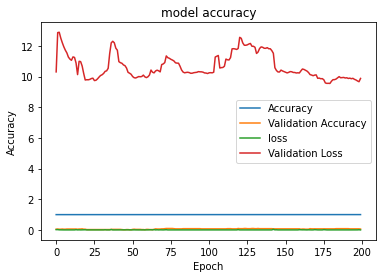

In [151]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()
